### Install Dependencies

In [134]:
#%pip install pandas
#%pip install matplotlib
#%pip install python-dotenv
#%pip install coinbase-advanced-py

### Import dependencies

In [135]:
import os
import pandas as pd  
import matplotlib.pyplot as plt
from coinbase.rest import RESTClient
from dotenv import load_dotenv
import json
import time
import matplotlib.pyplot as plt
from datetime import datetime, time

client = RESTClient() # Uses environment variables for API key and secretimport os

In [136]:
load_dotenv()

api_secret = os.getenv('KEY_SECRET')
api_key = os.getenv('KEY_NAME')

client = RESTClient(api_key=api_key, api_secret=api_secret) # Uses environment variables for API key and secretimport os


In [137]:
# Provided datetime string
date_string = "2025-03-14 23:04:16.929545+00:00"

# Convert to a datetime object
dt = datetime.fromisoformat(date_string)

# Convert to Unix timestamp in seconds
current_time = int(dt.timestamp())
print(current_time)

1741993456


In [138]:
total_trades = []
start_time = 1739660656
end_time = 1741993456
limit = end_time - start_time
interval = 60
count = 0
success = 0

while start_time < end_time:
    count += 1
    trades = client.get_market_trades('ETH-USD', 1, start_time, start_time + 1)
    try:
        total_trades.append(trades['trades'][0])
        start_time = start_time + interval
        success += 1
    except IndexError as e:
        start_time = start_time + 1
    
    if(count % 1000 == 0):
        print(f'Completed {count+1}/{limit} queries. Successful queries: {success}')

Completed 1001/2332800 queries. Successful queries: 676
Completed 2001/2332800 queries. Successful queries: 1355
Completed 3001/2332800 queries. Successful queries: 2095
Completed 4001/2332800 queries. Successful queries: 2908
Completed 5001/2332800 queries. Successful queries: 3663
Completed 6001/2332800 queries. Successful queries: 4505
Completed 7001/2332800 queries. Successful queries: 5157
Completed 8001/2332800 queries. Successful queries: 5969
Completed 9001/2332800 queries. Successful queries: 6621
Completed 10001/2332800 queries. Successful queries: 7387
Completed 11001/2332800 queries. Successful queries: 8044
Completed 12001/2332800 queries. Successful queries: 8892
Completed 13001/2332800 queries. Successful queries: 9472
Completed 14001/2332800 queries. Successful queries: 10230


KeyboardInterrupt: 

In [139]:
len(total_trades)

10733

In [140]:
str_trades = str(total_trades)
# Replace single quotes with double quotes to make it JSON-compatible
data_string_fixed = str_trades.replace("'", '"')

# Convert the string to a proper Python list of dictionaries
data_list = json.loads(data_string_fixed)

In [141]:
df_trades = pd.DataFrame(data_list)
df_trades

,trade_id,product_id,price,size,time,side,bid,ask,exchange
0,610378394,ETH-USD,2693.31,0.00266163,2025-02-15T23:04:16.929545Z,SELL,,,
1,610378657,ETH-USD,2693.98,0.00053698,2025-02-15T23:05:16.783522Z,SELL,,,
2,610378885,ETH-USD,2695.08,0.0005743,2025-02-15T23:06:16.940200Z,SELL,,,
3,400138352,ETH-USD,2694.7,0.00387337,2025-02-15T23:07:16.020Z,BUY,,,
4,610379457,ETH-USD,2694.42,0.00194469,2025-02-15T23:08:16.422606Z,SELL,,,
...,...,...,...,...,...,...,...,...,...
10728,613310968,ETH-USD,2806.52,0.00875412,2025-02-23T11:00:02.107443Z,BUY,,,
10729,613311099,ETH-USD,2804.37,0.001,2025-02-23T11:01:06.365069Z,SELL,,,
10730,613311200,ETH-USD,2806.51,0.00002494,2025-02-23T11:02:06.129324Z,SELL,,,
10731,613311311,ETH-USD,2806.38,0.00372784,2025-02-23T11:03:06.859032Z,BUY,,,


/var/folders/1f/5lhk7sb97rz53v7gk1vkcjkr0000gn/T/ipykernel_83390/3006657511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trades['price'] = pd.to_numeric(df_trades['price'])


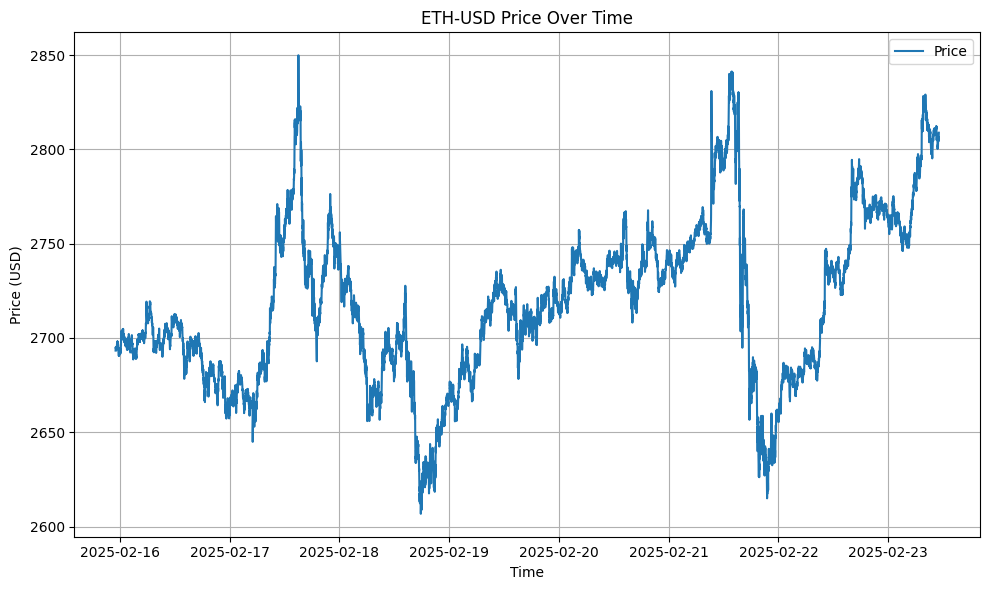

In [142]:
# Convert 'time' to datetime, coercing errors
df_trades['time'] = pd.to_datetime(df_trades['time'], errors='coerce')

# Drop rows where 'time' is NaT (invalid date)
df_trades = df_trades.dropna(subset=['time'])

# Convert 'price' column to numeric
df_trades['price'] = pd.to_numeric(df_trades['price'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_trades['time'], df_trades['price'], linestyle='-', label='Price')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('ETH-USD Price Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [143]:
df_trades.to_csv('recent_eth_prices.csv')